<a href="https://colab.research.google.com/github/jcmachicao/pucp__gobierno_sistemas_proyectos/blob/main/pucp_men623__cambio_valor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --- 1. Datos base del proyecto ---
tareas = pd.DataFrame({
    'tarea': ['Fundación', 'Montaje', 'Conexión'],
    'duración': [10, 15, 5],
    'valor': [25000, 50000, 25000],   # Valor total de la tarea (para EV/PV)
    'costo': [10000, 20000, 5000],    # Costo total de la tarea (para CP)
    'inicio': [0, 10, 25]             # Día de inicio del proyecto
})

In [3]:
# --- 2. Generador de curva por día ---
def generar_curvas(tareas, dias_totales=60):
    fechas = np.arange(0, dias_totales + 1)
    pv = np.zeros_like(fechas, dtype=float)
    cp = np.zeros_like(fechas, dtype=float)

    for _, row in tareas.iterrows():
        start = row['inicio']
        end = start + row['duración']
        idx = (fechas >= start) & (fechas < end)
        pv[idx] += row['valor'] / row['duración']
        cp[idx] += row['costo'] / row['duración']

    curva_pv = np.cumsum(pv)
    curva_cp = np.cumsum(cp)
    return fechas, curva_pv, curva_cp

In [9]:
# --- 3. Simulación de avance real (EV y AC) ---
def simular_ejecucion(tareas, dias_totales=60, desviacion=0.9):
    fechas = np.arange(0, dias_totales + 1)
    ev = np.zeros_like(fechas, dtype=float)
    ac = np.zeros_like(fechas, dtype=float)

    for _, row in tareas.iterrows():
        start = row['inicio']
        end = start + row['duración']
        idx = (fechas >= start) & (fechas < end)
        ev[idx] += (row['valor'] * desviacion) / row['duración']
        # Supongamos que los costos reales son un 10% más altos
        ac[idx] += (row['costo'] * desviacion) / row['duración']

    curva_ev = np.cumsum(ev)
    curva_ac = np.cumsum(ac)
    return curva_ev, curva_ac

In [12]:
# --- 4. Cálculo de indicadores ---
def calcular_spi_cpi(pv, ev, ac, dia):
    return ev[dia]/pv[dia] if pv[dia] > 0 else np.nan, ev[dia]/ac[dia] if ac[dia] > 0 else np.nan

# --- 5. Función para agregar nuevas tareas (cambio de alcance) ---
def agregar_alcance(tareas, nuevas_tareas):
    return pd.concat([tareas, nuevas_tareas], ignore_index=True)

# --- 6. Simulación sin cambio de alcance ---
fechas, curva_pv1, curva_cp1 = generar_curvas(tareas)
curva_ev1, curva_ac1 = simular_ejecucion(tareas)

# SPI y CPI antes del cambio (día 29)
spi1, cpi1 = calcular_spi_cpi(curva_pv1, curva_ev1, curva_ac1, dia=29)

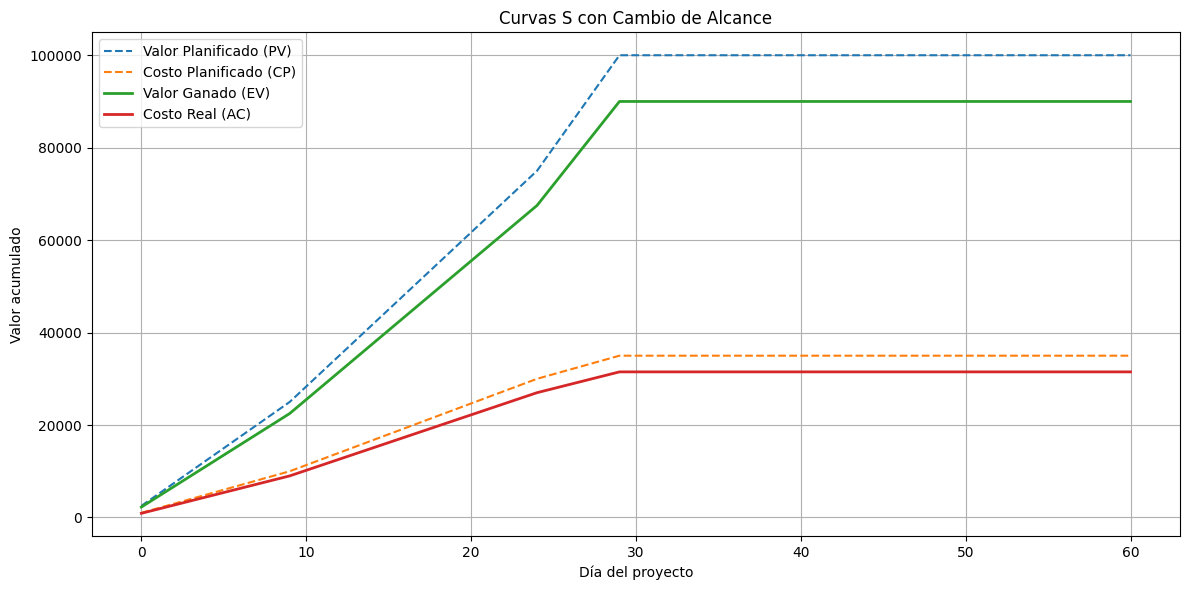

In [13]:
# --- 6B. Gráfico de curvas ---
plt.figure(figsize=(12,6))
plt.plot(fechas, curva_pv1, label='Valor Planificado (PV)', linestyle='--')
plt.plot(fechas, curva_cp1, label='Costo Planificado (CP)', linestyle='--')
plt.plot(fechas, curva_ev1, label='Valor Ganado (EV)', linewidth=2)
plt.plot(fechas, curva_ac1, label='Costo Real (AC)', linewidth=2)
plt.title('Curvas S con Cambio de Alcance')
plt.xlabel('Día del proyecto')
plt.ylabel('Valor acumulado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# --- 7. Agregar nuevas tareas en el día 30 ---
nuevas_tareas = pd.DataFrame({
    'tarea': ['Subestación', 'Cableado adicional'],
    'duración': [10, 7],
    'valor': [15000, 8000],
    'costo': [7000, 4000],
    'inicio': [30, 35]
})
tareas_actualizadas = agregar_alcance(tareas, nuevas_tareas)

# --- 8. Curvas con nuevo alcance ---
fechas, curva_pv2, curva_cp2 = generar_curvas(tareas_actualizadas)
curva_ev2, curva_ac2 = simular_ejecucion(tareas_actualizadas)

# SPI y CPI después del cambio (día 50)
spi2, cpi2 = calcular_spi_cpi(curva_pv2, curva_ev2, curva_ac2, dia=50)

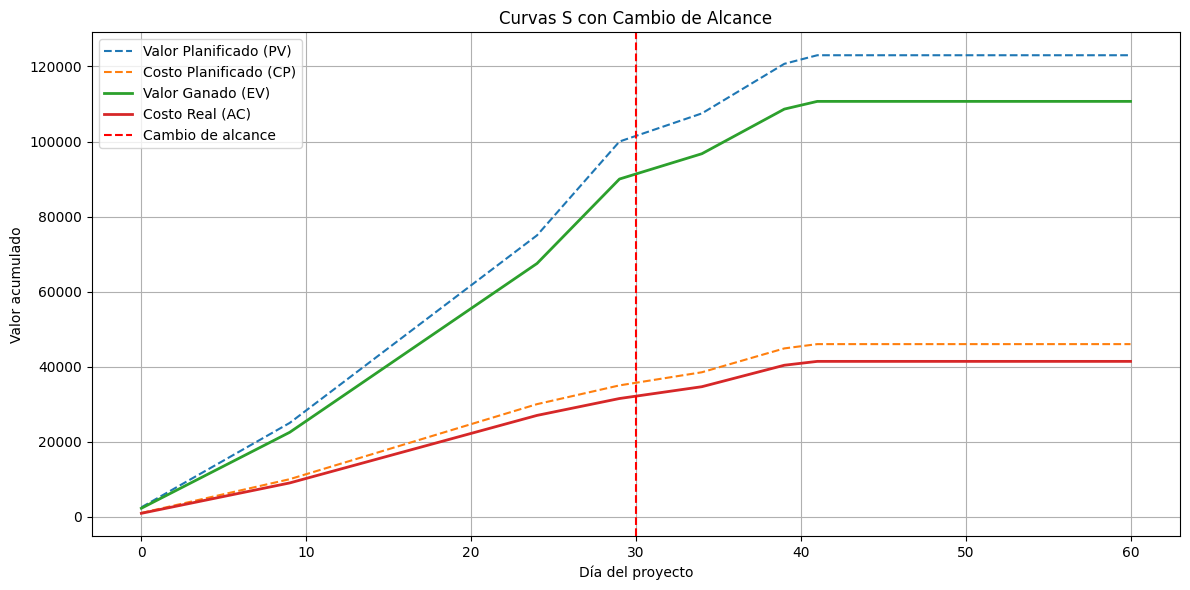

In [15]:
# --- 9. Gráfico de curvas ---
plt.figure(figsize=(12,6))
plt.plot(fechas, curva_pv2, label='Valor Planificado (PV)', linestyle='--')
plt.plot(fechas, curva_cp2, label='Costo Planificado (CP)', linestyle='--')
plt.plot(fechas, curva_ev2, label='Valor Ganado (EV)', linewidth=2)
plt.plot(fechas, curva_ac2, label='Costo Real (AC)', linewidth=2)
plt.axvline(x=30, color='red', linestyle='--', label='Cambio de alcance')
plt.title('Curvas S con Cambio de Alcance')
plt.xlabel('Día del proyecto')
plt.ylabel('Valor acumulado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# --- 10. Mostrar indicadores clave ---
print(f"Indicadores antes del cambio (día 29): SPI = {spi1:.2f}, CPI = {cpi1:.2f}")
print(f"Indicadores después del cambio (día 50): SPI = {spi2:.2f}, CPI = {cpi2:.2f}")

Indicadores antes del cambio (día 29): SPI = 0.90, CPI = 2.86
Indicadores después del cambio (día 50): SPI = 0.90, CPI = 2.67
